![banner_eda](https://github.com/cistelsa/Commerce_Data_Analysis_and_Recommendations/blob/main/5_Sources/Images/banner_eda.gif?raw=true)
# <h1 align=center> <font color='#307A71'>**EDA - BUSINESS**</font> </h1>
## <h1 align=center> (Exploratory, Data, Analysis) </h1>

Para el desarrollo de la primera fase del proyecto, realizaremos la aplicación del proceso EDA.

El **_`Análisis Exploratorio de Datos (Exploratory Data Analysis o EDA, por sus siglas en inglés)`** es un enfoque fundamental en la estadística y la ciencia de datos que implica investigar y examinar un conjunto de datos de manera visual y estadística para extraer información, identificar patrones, detectar anomalías y generar hipótesis iniciales. El EDA se realiza antes de aplicar modelos más complejos o análisis estadísticos avanzados y tiene como objetivo comprender la naturaleza y las características del conjunto de datos en cuestión.

En este documento se encuentra un reporte preliminar de la calidad de los Datos obtenidos del Dataset Business, de la plataforma Yelp. Inicialmente se trabajará una Data que contiene solo los datos filtrados por categorías de Hoteles.

## <font color='#307A71'>**A. Importando los datos**</font>

<font color='#307A71'>**1. Instalación:**</font>  se procede a instalar las aplicaciones e importación de librerías a utilizar.

In [2]:
pip install geopandas

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 4, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 107.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 106.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 117.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd                 # dataframes
import matplotlib.pyplot as plt     # plots
import seaborn as sns               # plots
import numpy as np                  # manejo de arrays
import datetime                     # formato de fechas
from math import ceil               # redondeo
from pyspark.sql.functions import col
import matplotlib.patches as mpatches

# Graficar en mapa con latitud y longitud
import geopandas as gpd                     
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.colors as colors

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 5, Finished, Available)

<font color='#307A71'>**2. Cargue Información:**</font> </h1>  Cargue del DataFrame desde el Dataset Business, con Spark.

In [4]:
df_business = spark.read.format("csv").option("header","true").load("Files/data/original/Yelp/business.csv")

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 6, Finished, Available)

<font color='#307A71'>**3. Consultar Data:**</font> </h1> Lectura del DataFrame.

In [5]:
df_business = df_business.toPandas()
df_business

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 7, Finished, Available)

,_c0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,18,8wGISYjYkE2tSqn3cDMu8A,Nifty Car Rental,1241 Airline Dr,Kenner,PA,70062,29.981183,-90.2540123,3.5,14,1,None,"Automotive, Car Rental, Hotels & Travel, Truck...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
1,34,w_AMNoI1iG9eay7ncmc67w,River 127,100 Iberville St,New Orleans,PA,70130,29.951359,-90.0646715,3.0,12,1,"""{'BusinessAcceptsCreditCards': 'True', 'WiFi'...","'RestaurantsPriceRange2': '2'}""","Event Planning & Services, Hotels, Hotels & Tr..."
2,55,xM6LoUcnpDpMBzXs_7dXAg,Fairfield Inn & Suites,719 E Baltimore Pike,Kennett Square,AB,19348,39.8562475317,-75.6946098804,3.0,37,1,"""{'BusinessAcceptsCreditCards': 'True', 'WiFi'...","'RestaurantsPriceRange2': '2'}""","Hotels, Hotels & Travel, Event Planning & Serv..."
3,65,uczmbBk5O3tYhGue13dCDg,New Orleans Spirit Tours,723 St Peter St,New Orleans,IN,70130,29.958431,-90.065173,4.0,38,1,"""{'WiFi': """"u'no'""""}""","Hotels & Travel, Tours, Local Flavor","{'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ..."
4,67,eYxGFkxo6m3SYGVTh5m2nQ,Big Boyz Toyz Motorcycle Rentals,4158 E Grant Rd,Tucson,PA,85712,32.2503237,-110.9036553,4.5,8,1,None,"Towing, Hotels & Travel, Automotive, Motorcycl...","{'Monday': '8:30-18:0', 'Tuesday': '8:30-18:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5853,150244,JkF0um3dxe-cOBYeergOhQ,St Petersburg Carriages,320 Beach Dr,St. Petersburg,NV,33701,27.7752527,-82.6321214,3.5,6,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Tours, Hotels & Travel, Event Planning & Servi...",None
5854,150253,ktZZNOKr3NcRo8hqQnc-FA,B & B Transportation,"1645 W Valencia Rd, Ste 109-402",Tucson,AB,85746,32.132352,-111.000017,3.5,9,1,{'BusinessAcceptsCreditCards': 'True'},"Hotels & Travel, Transportation, Medical Trans...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
5855,150255,sj4kRiUYo3akee0CuUbONw,Extended Stay America - St. Louis - Westport -...,12161 Lackland Rd,Maryland Heights,TN,63146,38.697319,-90.447389,2.0,18,1,"""{'RestaurantsPriceRange2': '2', 'BusinessAcce...","Hotels & Travel, Event Planning & Services, Ho...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
5856,150269,2dVJ7R-3JMmu2v4DJYtBbw,Spring Mount Hotel,3 Main St,Schwenksville,AZ,19473,40.275532,-75.456772,2.0,5,1,"""{'RestaurantsPriceRange2': '2', 'RestaurantsR...",'hipster': False,'romantic': False


## <font color='#307A71'>**B. Limpieza de Datos**</font>

- En el DataFrame **_df_business_** se observa la columna "_c0" la cual contiene el índice que tenía la Data original antes de ser filtrada y que para el proceso actual no es relevante, por tal razón se debe eliminar antes de cualquier procedimiento para alivianar el tamaño del DataFrame.

<font color='#307A71'>**4. Eliminar Columna:**</font> Para eliminar la columna '_c0' del DataFrame **_df_business_**, se procede a seleccionar solo las columnas que en adelante se van a utilizar.

In [6]:
df_business = df_business.loc[:,['business_id', 
                                'name', 
                                'address', 
                                'city', 
                                'state', 
                                'postal_code', 
                                'latitude', 
                                'longitude', 
                                'stars', 
                                'review_count', 
                                'is_open', 
                                'attributes', 
                                'categories', 
                                'hours'
                               ]]

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 8, Finished, Available)

<font color='#307A71'>**5. Información:**</font> Se utiliza el método _.info_ para verificar la información resumida del DataFrame, incluyendo detalles sobre el tipo de datos, el uso de memoria y la existencia de valores nulos.

In [7]:
df_business.info()

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 9, Finished, Available)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5858 entries, 0 to 5857
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   5858 non-null   object
 1   name          5858 non-null   object
 2   address       5528 non-null   object
 3   city          5858 non-null   object
 4   state         5858 non-null   object
 5   postal_code   5855 non-null   object
 6   latitude      5858 non-null   object
 7   longitude     5858 non-null   object
 8   stars         5858 non-null   object
 9   review_count  5858 non-null   object
 10  is_open       5858 non-null   object
 11  attributes    5858 non-null   object
 12  categories    5858 non-null   object
 13  hours         5858 non-null   object
dtypes: object(14)
memory usage: 640.8+ KB


###### <font color='#307A71'>**Observaciones**</font>

* Todas las columnas tienen configurado como tipo de datos _'object'_, se debe cambiar el tipo de datos numéricos en las columnas que se requiera.
* Solo las columnas _'address'_ y _'postal_code'_ tienen valores nulos, los cuales se deben revisar a mayor profundidad para determinar qué se debe hacer con ellos.
* La columna _'state'_ contiene datos que se deben asignar como de tipo string de dos dígitos en mayúscula correspondientes las subdivisiones de los códigos ISO 3166-2 para Estados Unidos, que es la abreviatura postal del estado, distrito o área periférica en la que se ubica el negocio.
* La columna _'postal_code'_ contiene datos que se deben asignar como de tipo numérico entero de 5 dígitos y corresponde al código postal del área en la ciudad del Estado registrado para el negocio.
* Las columnas _'latitude'_ y _'longitude'_ contienen datos que se deben asignar como de tipo float con 7 decimales y representan los datos de ubicación de la empresa asociada al _'business_id'_.
* La columna _'stars'_ contiene datos que se deben asignar como de tipo float con 1 decimal, redondeados a 0 o 0.5 y corresponde al rating en estrellas del _'business_id'_.
* La columna_'review_count'_ contiene datos que se deben asignar como de tipo numérico entero y corresponde al número de reseñas recibidas de los usuarios en la plataforma Yelp.
* La columna _'is_open'_ contiene datos que se deben asignar como de tipo numérico entero y solo debe haber dos variables: 0 si esta cerrado y 1 si está abierto el negocio.
* La columna _'atributes'_ contiene los datos del negocio como valores estos son de tipo objeto y algunos valores de atributos también pueden ser objetos.
* La columna _'categories'_ contiene listas con las categorías de los negocios en los cuales se clasifica el _'business_id'_.
* La columna _'hours'_ contiene objetos con los datos del día de la semana y la hora de apertura y cierre del negocio para la atención al público.

<font color='#307A71'>**6. Datos por Columna:**</font> Con base en las observaciones anteriores, se realiza consulta del porcentaje de datos contenidos por cada columna.

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 10, Finished, Available)

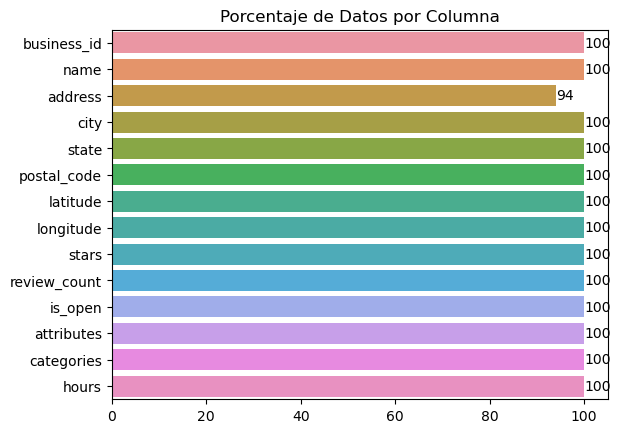

In [8]:
ax = sns.barplot(x = (round(df_business.notnull().sum()*100/df_business.shape[0])).values, y = df_business.columns)
ax.bar_label(ax.containers[0])
plt.title('Porcentaje de Datos por Columna');

* En términos generales el Dataset y todas las variables cuentan con un nivel de datos superior al 90% solo las columnas de _address_ y _postal_code_ tienen faltantes, por lo cual se debe revisar con más detalle su contenido y procurar su normalización.

<font color='#307A71'>**7. Nulos en '_postal_code_':**</font> Se consultan las filas completas de los valores nulos en la columna '_postal_code_' para identificar los negocios afectados.

In [9]:
filas_con_nulos = df_business[df_business['postal_code'].isnull()]
filas_con_nulos

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 11, Finished, Available)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
2912,UBgrDw2Z66bjiW49ss75aQ,US Airways,None,Los Ranchitos,IN,None,32.1052612958,-110.9420013428,1.5,7,0,None,"Hotels & Travel, Transportation, Airlines",None
2978,II7CpZjGyx8aFTu3wJbQNw,Tour Orleans,None,New Orleans,FL,None,29.953699962,-90.0777498633,5.0,6,1,None,"Hotels & Travel, Bus Tours, Tours","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
4626,gayjHl5TinOfNGiaDtGYlQ,High Level Bridge,None,Edmonton,FL,None,53.5309767201,-113.5103619104,4.5,8,1,None,"Local Flavor, Tours, Hotels & Travel",None


<font color='#307A71'>**8. Nulos en '_address_':**</font> Se consultan las filas completas de los valores nulos en la columna '_address_' para identificar los negocios afectados.

In [10]:
filas_con_nulos2 = df_business[df_business['address'].isnull()]
filas_con_nulos2

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 12, Finished, Available)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
12,MyE_zdul_JO-dOHOug4GQQ,Watson Adventures Scavenger Hunts,None,Philadelphia,FL,19019,40.1197128,-75.0097103,3.0,8,1,{'BusinessAcceptsCreditCards': 'True'},"Local Flavor, Team Building Activities, Active...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
15,usv5G5cO314pPHRTGq2Eyw,Best Tours,None,Philadelphia,PA,19019,40.1197128,-75.0097103,1.0,38,1,None,"Tours, Walking Tours, Hotels & Travel, Food Tours",None
35,ygnm0ze5oL4E9JpysZAxBA,Absolute Luxury,None,Tampa Bay,AB,33578,27.8585758,-82.3397635,1.0,5,1,{'BusinessAcceptsCreditCards': 'True'},"Limos, Party Bus Rentals, Transportation, Hote...","{'Monday': '8:0-0:0', 'Tuesday': '8:0-0:0', 'W..."
36,DtxrbAIsSMs4Qshm99AFAQ,Reno Tahoe Shuttle,None,Reno,NV,89503,39.5424616,-119.8410174,3.5,26,0,"""{'WiFi': """"u'no'""""}""","Hotels & Travel, Airport Shuttles, Transportation","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
67,O2fe1BV4DCUxDvDJXQa2GQ,Antique Limousine of Indianapolis,None,Indianapolis,IN,46254,39.8494377,-86.2666463,5.0,8,1,{'BusinessAcceptsCreditCards': 'True'},"Transportation, Limos, Hotels & Travel, Party ...","{'Monday': '8:0-20:0', 'Tuesday': '8:0-20:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5807,jSqaO1WkR97NtB72kVJVXQ,A Presidential Limousine,None,Carmel,FL,46032,39.9693,-86.1650024,2.5,6,1,None,"Transportation, Hotels & Travel, Limos",None
5823,g8CyLf6tLDcME7Ik3NIN_g,US Taxi,None,Boise,PA,83713,43.6361475,-116.3287866,4.5,6,1,"""{'WiFi': """"u'free'""""}""","Airport Shuttles, Transportation, Taxis, Hotel...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
5830,RyB0ul6e_pfCluuDRm3dBg,AM Party Bus,None,New Orleans,TN,70121,29.9595011,-90.1612029,3.5,7,1,"""{'ByAppointmentOnly': 'True', 'BusinessAccept...","'BusinessAcceptsBitcoin': 'False'}""","Transportation, Hotels & Travel, Party Bus Ren..."
5849,FvN-rcK9Ly3iK-zPSVKbDA,Tucson Ghost Tour,None,Tucson,FL,85730,32.1772542,-110.7956878,5.0,8,1,None,"Tours, Hotels & Travel","{'Monday': '9:0-19:0', 'Tuesday': '9:0-19:0', ..."


<font color='#307A71'>**9. Reemplaza Nulos en '_postal_code_':**</font> Se convierten los valores no numéricos en NaN en esa columna.

In [11]:
df_business['postal_code'] = pd.to_numeric(df_business['postal_code'], errors='coerce')

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 13, Finished, Available)

<font color='#307A71'>**10. Reemplaza Nulos en '_address_':**</font> Se convierten los valores no numéricos en NaN en esa columna.

In [12]:
df_business['address'] = pd.to_numeric(df_business['address'], errors='coerce')

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 14, Finished, Available)

<font color='#307A71'>**11. Cambio Tipo de Formato en '_address_':**</font> Teniendo en cuenta que los datos de la columna _'address'_ son cadenas de texto alfanuméricos, se procede a hacer el cambio del formato de los datos en esa columna.

In [13]:
df_business['address'] = df_business['address'].astype(str)

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 15, Finished, Available)

<font color='#307A71'>**12. Cambio Tipo de Formato a Float:**</font> Con base en las observaciones realizadas en el punto 5, se procede a hacer el cambio del formato de los datos en las columnas _'latitude', 'longitude', 'stars'_.

In [14]:
columnas_cambio = ['latitude', 'longitude', 'stars']
df_business[columnas_cambio] = df_business[columnas_cambio].astype(float)

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 16, Finished, Available)

<font color='#307A71'>**13. Cambio Tipo de Formato a Int:**</font> Con base en las observaciones realizadas en el punto 5, se procede a hacer el cambio del formato de los datos en las columnas _'postal_code', 'review_count', 'is_open'_.

In [15]:
columnas_cambio_enteros = ['postal_code', 'review_count', 'is_open']
df_business[columnas_cambio_enteros] = df_business[columnas_cambio_enteros].fillna(0)
df_business[columnas_cambio_enteros] = df_business[columnas_cambio_enteros].astype(int)

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 17, Finished, Available)

<font color='#307A71'>**14. Consulta Información:**</font> Se utiliza el método _.info_ para verificar la información resumida del DataFrame, y validar los cambios realizados.

In [16]:
df_business.info()

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 18, Finished, Available)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5858 entries, 0 to 5857
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   5858 non-null   object 
 1   name          5858 non-null   object 
 2   address       5858 non-null   object 
 3   city          5858 non-null   object 
 4   state         5858 non-null   object 
 5   postal_code   5858 non-null   int64  
 6   latitude      5858 non-null   float64
 7   longitude     5858 non-null   float64
 8   stars         5858 non-null   float64
 9   review_count  5858 non-null   int64  
 10  is_open       5858 non-null   int64  
 11  attributes    5858 non-null   object 
 12  categories    5858 non-null   object 
 13  hours         5858 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 640.8+ KB


<font color='#307A71'>**15. Consulta Duplicado:**</font> Se valida si el DataFrame contiene valores duplicados.

In [17]:
df_duplicados = df_business[df_business.duplicated(keep=False)].copy()
df_duplicados

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 19, Finished, Available)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours


* De acuerdo con los resultados de la consulta, la Data no contiene valores duplicados o repetidos.

<font color='#307A71'>**16. Resumen Estadístico Inicial:**</font> A través del método _.describe_ se consulta las estadísticas descriptivas básicas para las columnas numéricas del DataFrame, las estadísticas que muestra son las siguientes:

- **count:** El número de observaciones no nulas en la columna. Indica cuántos valores no faltantes hay en esa columna.

- **mean:** La media aritmética de los valores en la columna. Es el promedio de todos los valores numéricos.

- **std:** La desviación estándar de los valores en la columna. Mide la dispersión o variabilidad de los datos. Valores más altos indican una mayor dispersión.

- **min:** El valor mínimo en la columna, es decir, el valor más pequeño entre todos los valores numéricos.

- **25%:** El percentil 25, también conocido como el primer cuartil. Indica el valor por debajo del cual se encuentra el 25% de los datos.

- **50%:** El percentil 50, también conocido como la mediana. Es el valor que divide el conjunto de datos en dos mitades iguales.

- **75%:** El percentil 75, también conocido como el tercer cuartil. Indica el valor por debajo del cual se encuentra el 75% de los datos.

- **max:** El valor máximo en la columna, es decir, el valor más grande entre todos los valores numéricos.

In [18]:
df_business.describe().round(2)

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 20, Finished, Available)

,postal_code,latitude,longitude,stars,review_count,is_open
count,5858.00,5858.00,5858.00,5858.00,5858.00,5858.00
mean,48484.69,35.45,-90.33,3.26,54.79,0.87
std,26191.07,5.53,14.12,1.09,127.50,0.33
min,0.00,27.58,-120.08,1.00,5.00,0.00
25%,33603.00,29.96,-90.30,2.50,9.00,1.00
50%,37214.00,36.16,-86.70,3.50,21.00,1.00
75%,70116.00,39.86,-82.46,4.00,49.00,1.00
max,96161.00,53.65,-74.66,5.00,3345.00,1.00


<font color='#307A71'>**17. Valores Únicos:**</font> A continuación se relacionan los valores únicos por variables.

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 21, Finished, Available)

Text(0.5, 1.0, 'Cantidad de Valores Únicos por Columna')

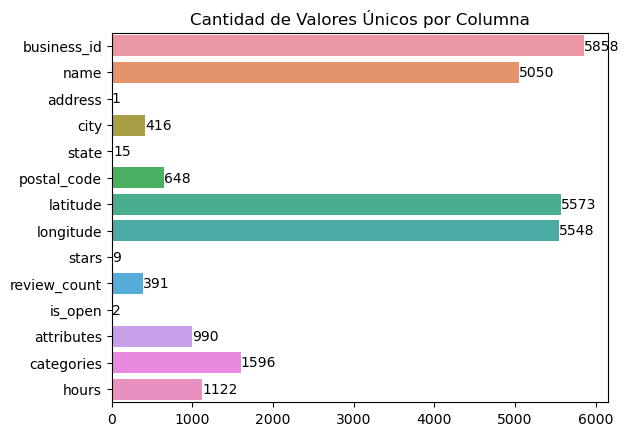

In [19]:
ax = sns.barplot(x = df_business.nunique().values, y = df_business.columns)
ax.bar_label(ax.containers[0])
plt.title('Cantidad de Valores Únicos por Columna')

Con base en los resultados se puede determinar que:

- Los ID de los negocios no se repiten, por tanto hay certeza de que no hay duplicados y que cada negocio es diferente.
- Hay 1.596 categorías que incluyen la palabra **"Hotel"**, pero que no necesariamente son hoteles, por lo que se debe depurar la información para aplicar las herramientas directamente al sector económico establecido en los objetivos del proyecto.
- Aunque la aplicación Yelp tiene ingenrencia en todo el territorio de Estados Unidos, los datos relacionados con **Hoteles** solo involucran el 30% del total de los estados del País.

## <font color='#307A71'>**C. Visualización**</font>

Una vez que hemos terminado el proceso de limpieza, pasamos al análisis visual de los datos. Realizaremos análisis univariante y multivariante.

### <font color='#307A71'>**i. Análisis Univariante**</font>

Para la realización de este análisis se utiliza un histograma con estimación kernel de la densidad, a menudo llamado simplemente "Kernel Density Estimation (KDE)".

<font color='#307A71'>**18. Ubicación Geoespacial:**</font> Teniendo en cuenta que la data no incluye todos los estados de Estados Unidos, se realiza una ubicación en el mapa Norte América, de los datos suministrados por _**Longitud**_ y _**Latitud**_ para identificar visualmente el área de ingerencia de la Data.

In [20]:
crs = 'EPSG:4326'
geometry = [Point(xy) for xy in zip(df_business['longitude'], df_business['latitude'])]
geo_df = gpd.GeoDataFrame(df_business, 
                          crs = crs, 
                          geometry = geometry)

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 22, Finished, Available)

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 23, Finished, Available)

/tmp/ipykernel_8262/2163927744.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Text(0.5, 1.0, 'Distribución por Estados')

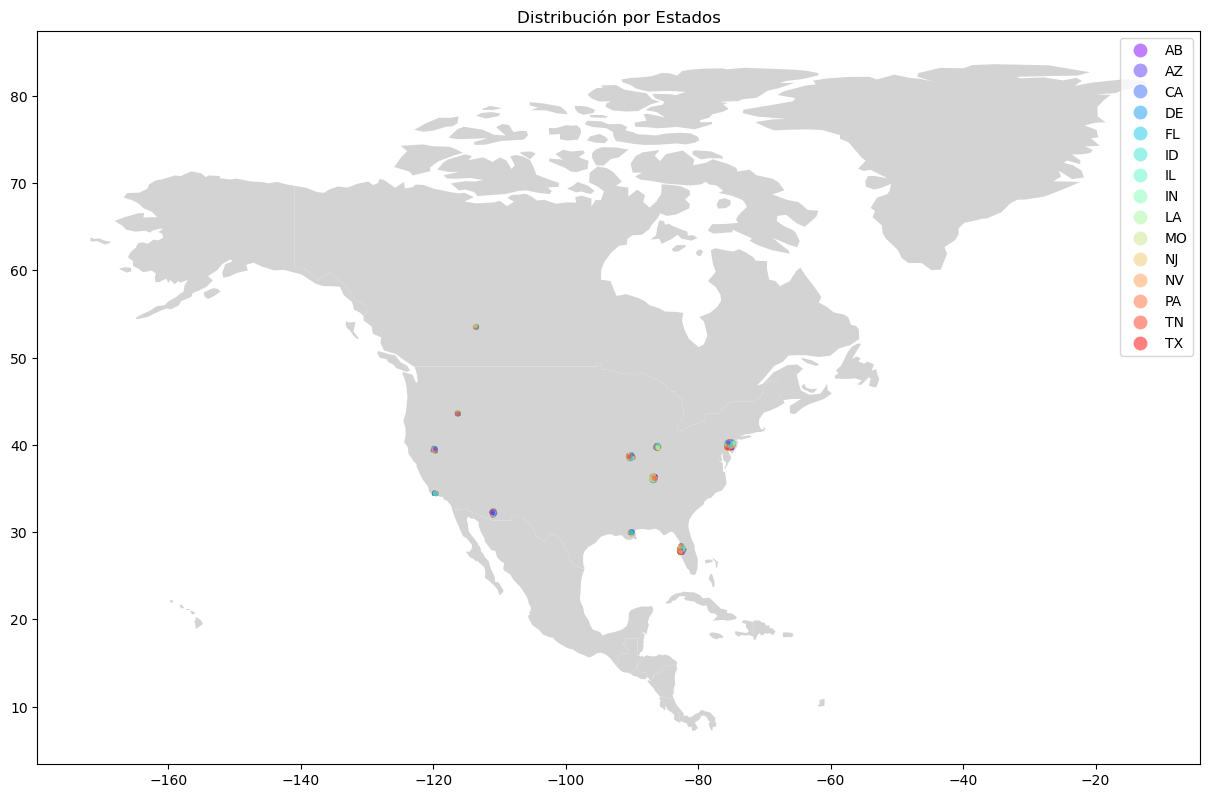

In [21]:
# Cargar un conjunto de datos geoespaciales del mundo predefinido
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
north_america = world[world['continent'] == 'North America']

# Definir el sistema de referencia espacial (CRS)
north_america = north_america.to_crs(epsg=4326)

fig, ax = plt.subplots(figsize=(15, 15))
north_america.plot(ax=ax, color='lightgrey')

# Crear el gráfico de puntos
scatter = geo_df.plot(column='state', ax=ax, cmap='rainbow', legend = True,
                           markersize=5, alpha=0.5)

ax.set_title('Distribución por Estados')

- De acuerdo con la ubicación en el mapa, los datos por Georeferenciación no se ubican solo en Estados Unidos, sino que algunas coordenadas se encuentran en Canada, dato que se debe tener en cuenta en los análisis que se realicen durante la ejecución del proyecto.

<font color='#307A71'>**19. Distribución de Códigos Postales:**</font> La primer variable a analizar es _postal_code_, la cual es importante para nosotros por cuanto nos ayuda con la caracterización de la población por ubicación.

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 24, Finished, Available)

Text(0.5, 1.0, 'Distribución de Códigos Postales')

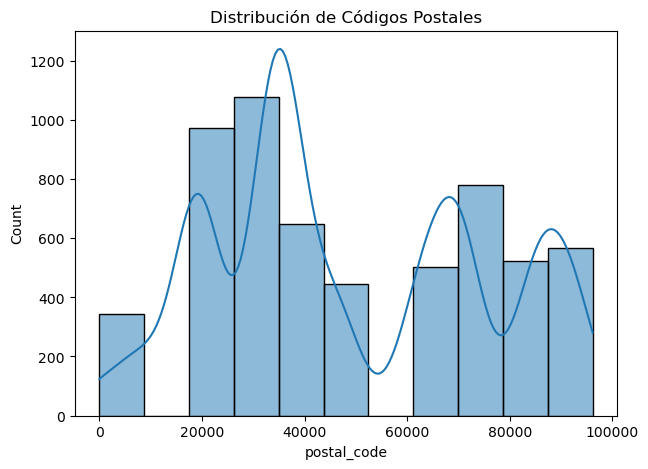

In [22]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df_business, x='postal_code', bins=11, kde=True)
plt.title('Distribución de Códigos Postales')

* La distribución de la variable _postal_code_ no es normal por cuanto no presenta una forma de campana, es asimétrica y tiene múltiples modas o picos en la distribución lo cual indica subpoblaciones dentro de los datos

<font color='#307A71'>**20. Distribución de Estrellas:**</font> La segunda variable a analizar es _stars_.

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 25, Finished, Available)

Text(0.5, 1.0, 'Distribución de Estrellas')

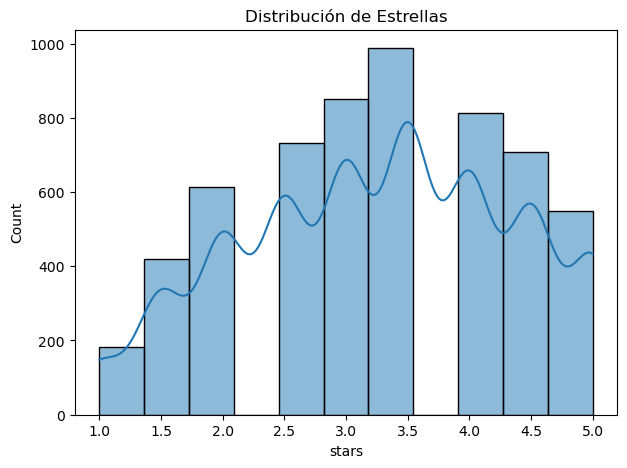

In [23]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df_business, x='stars', bins=11, kde=True)
plt.title('Distribución de Estrellas')

* Al igual que en _postal_code_ la distribución de esta variable no es normal, por cuanto no presenta una forma de campana continua sino que por el contrario, presenta una campana con sesgos subdividiéndose los datos en subpoblaciones.

<font color='#307A71'>**21. Distribución de Recuento de Reseñas:**</font> La tercera variable a analizar es _review_count_.

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 26, Finished, Available)

Text(0.5, 1.0, 'Distribución de Recuento de Reseñas')

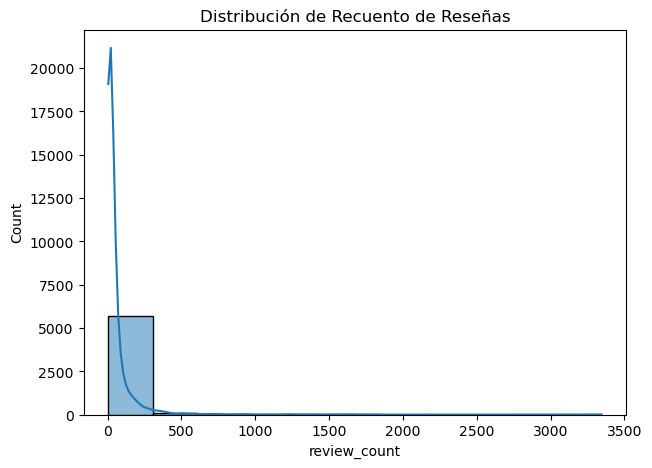

In [24]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df_business, x='review_count', bins=11, kde=True)
plt.title('Distribución de Recuento de Reseñas')

- Al igual que en las variables anteriores, la distribución de esta variable no es normal, tiene una asimetría en la distribución de datos con un sesgo positivo (hacia la derecha), esta cola larga indica que hay valores atípicos, extremos o inusuales en los datos hacia este extremo.

<font color='#307A71'>**22. Negocios por Categoría:**</font> Teniendo en cuenta que el Dataset tiene más de 1500 categorías distintas, a continuación se muestra las 20 categorías con mayor número de negocios relacionados al sector **Hotelero**.

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 27, Finished, Available)

Text(0, 0.5, 'Cantidad de Negocios')

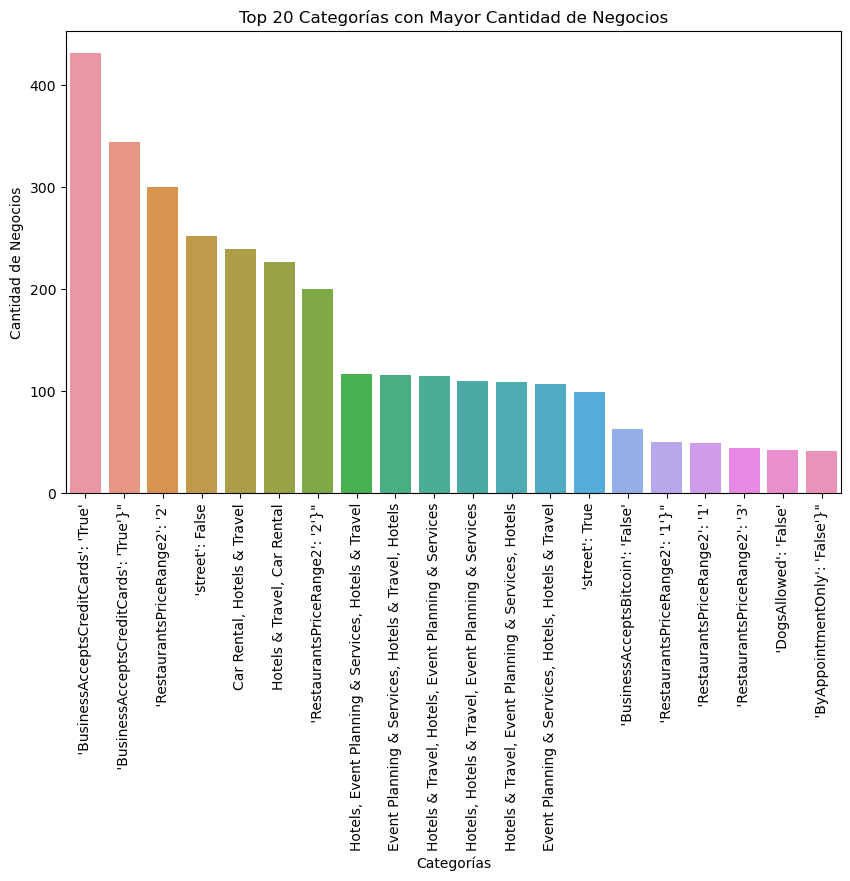

In [25]:
# Filtrar y clasificar las categorías por la cantidad de datos
top_categories = df_business['categories'].value_counts().head(20)

# Crear un nuevo DataFrame con las categorías principales
df_top_categories = df_business[df_business['categories'].isin(top_categories.index)]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajuste del tamaño de la figura
sns.countplot(data=df_top_categories, x='categories', order=top_categories.index)
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mayor legibilidad


# Agrega título y etiquetas de ejes
plt.title('Top 20 Categorías con Mayor Cantidad de Negocios')
plt.xlabel('Categorías')
plt.ylabel('Cantidad de Negocios')

In [26]:
df_top_categories['categories'].value_counts()

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 28, Finished, Available)

 'BusinessAcceptsCreditCards': 'True'                 432
 'BusinessAcceptsCreditCards': 'True'}"               344
 'RestaurantsPriceRange2': '2'                        300
 'street': False                                      252
Car Rental, Hotels & Travel                           239
Hotels & Travel, Car Rental                           227
 'RestaurantsPriceRange2': '2'}"                      200
Hotels, Event Planning & Services, Hotels & Travel    117
Event Planning & Services, Hotels & Travel, Hotels    116
Hotels & Travel, Hotels, Event Planning & Services    115
Hotels, Hotels & Travel, Event Planning & Services    110
Hotels & Travel, Event Planning & Services, Hotels    109
Event Planning & Services, Hotels, Hotels & Travel    107
 'street': True                                        99
 'BusinessAcceptsBitcoin': 'False'                     63
 'RestaurantsPriceRange2': '1'}"                       50
 'RestaurantsPriceRange2': '1'                         49
 'RestaurantsP

### <font color='#307A71'>**ii. Análisis Bivariante**</font>

Luego de ver como se comportan los datos por sí mismos, nos interesa ver cómo se comportan los datos en relación a los demás.

<font color='#307A71'>**23. Valores Atípicos:**</font> Para este proceso se realiza recuento de las vistas de cada negocio, clasificadas por estado y se resaltan algunos outliers.

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 29, Finished, Available)

<AxesSubplot: xlabel='state', ylabel='review_count'>

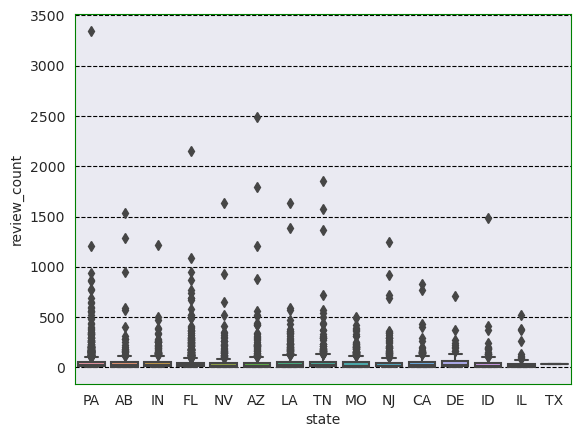

In [27]:
sns.axes_style()

parametros = {"axes.edgecolor": "green", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("darkgrid", rc = parametros)

sns.boxplot(x = "state", y = "review_count", data = df_business)

<font color='#307A71'>**23. Análisis Bivariante con Pairplot:**</font> Para este análisis se realiza primero el filtro de la Data ya que variables como _'city'_, _'state'_, _'latitude'_, _'longitude'_ y _'postal_code'_ muestran información similar y su inclusión en el análisis de correlación de datos sesga los resultados obtenidos; como variable categórica se deja solo _'categories'_ que es la variable directamente interesada para el proyecto.

In [28]:
variables_pairplot = ['postal_code', 
                    'stars',
                    'review_count',
                    'is_open',
                    'categories']

df_pairplot = df_business[variables_pairplot]
df_pairplot

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 30, Finished, Available)

,postal_code,stars,review_count,is_open,categories
0,70062,3.5,14,1,"Automotive, Car Rental, Hotels & Travel, Truck..."
1,70130,3.0,12,1,"'RestaurantsPriceRange2': '2'}"""
2,19348,3.0,37,1,"'RestaurantsPriceRange2': '2'}"""
3,70130,4.0,38,1,"Hotels & Travel, Tours, Local Flavor"
4,85712,4.5,8,1,"Towing, Hotels & Travel, Automotive, Motorcycl..."
...,...,...,...,...,...
5853,33701,3.5,6,1,"Tours, Hotels & Travel, Event Planning & Servi..."
5854,85746,3.5,9,1,"Hotels & Travel, Transportation, Medical Trans..."
5855,63146,2.0,18,1,"Hotels & Travel, Event Planning & Services, Ho..."
5856,19473,2.0,5,1,'hipster': False


StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 31, Finished, Available)

<Figure size 500x300 with 0 Axes>

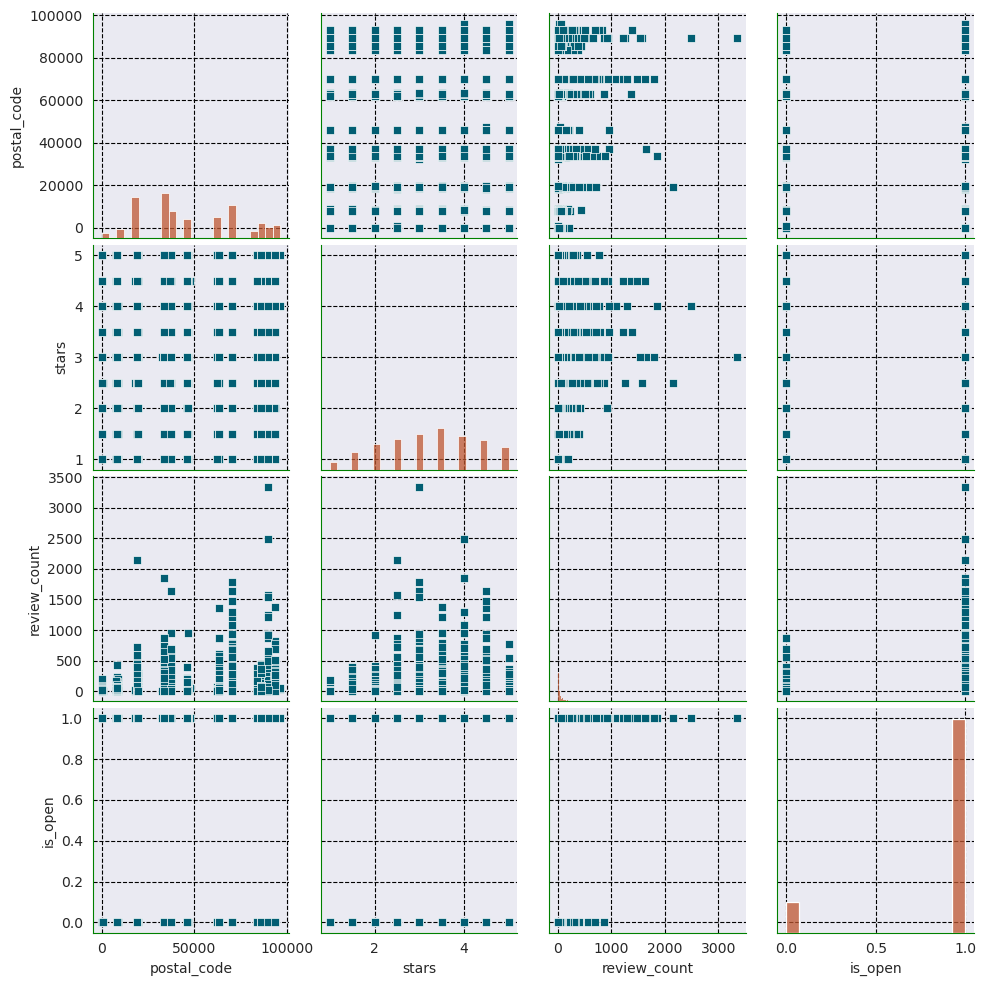

In [29]:
plt.figure(figsize=(5, 3))
sns.pairplot(df_pairplot,
             plot_kws = {'color': '#025E73', 'marker': 's'},
             diag_kws = {'color': '#BF5630'})

- **Falta de Relación Lineal:** La dispersión total en los gráficos de dispersión indica que no existe una relación lineal clara entre las variables. En otras palabras, los valores de una variable no están relacionados de manera predecible con los valores de la otra variable.


- **Independencia:** La falta de una forma de campana en las diagonales sugiere que las variables son independientes entre sí. Esto significa que no hay una relación sistemática o correlación evidente entre las variables en el análisis.

### <font color='#307A71'>**iii. Análisis Multivariable**</font>

En este punto se va a introducir una variable más a este proceso, que será la variable categórica de _**"categories"**_; teniendo en cuenta que el DataFrame original contiene más de 1.500 categorías, se concluye hacer éste análisis con el DataFrame filtrado _"df_top_categories"_. 

Podemos hacer el análisis introduciendo un _hue_ en el _pairplot_ para ver si podemos visualizar rápidamente alguna frontera de separación entre las variables de ubicación.

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 32, Finished, Available)

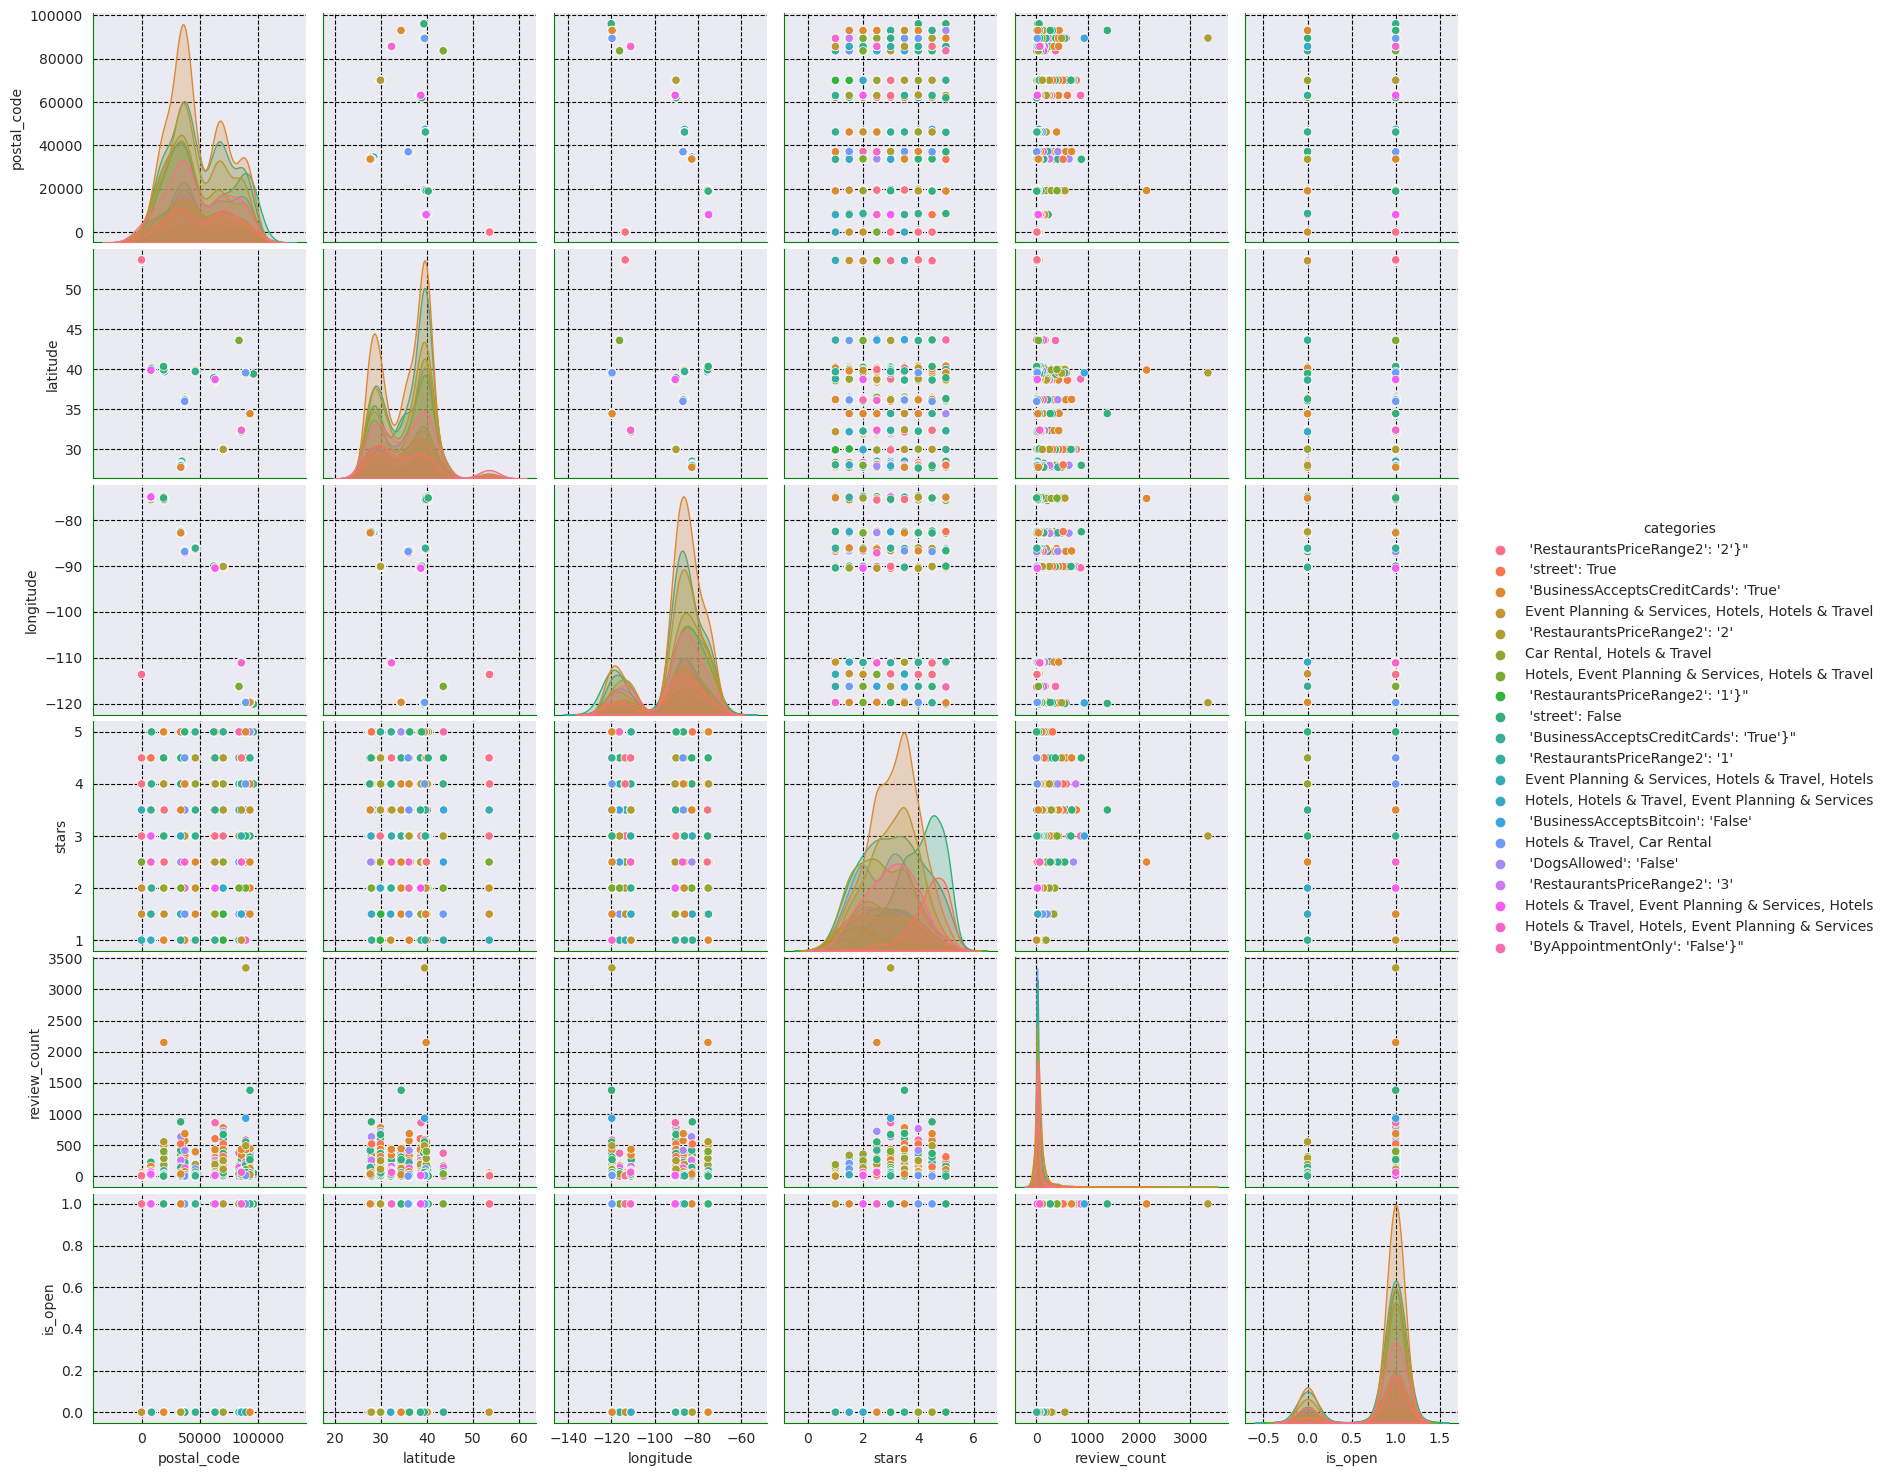

In [30]:
sns.pairplot(df_top_categories, hue = "categories")

- Tal como se mencionó antes, incluir variables de tipo longitud y latitud en un mismo análisis donde se incluye código postal, afecta los resultados, por tanto es mejor proceder a retirar estas variables del análisis multivariable.

In [31]:
# Filtrar y clasificar las categorías por la cantidad de datos
top_categories2 = df_pairplot['categories'].value_counts().head(20)

# Crear un nuevo DataFrame con las categorías principales
df_top_categories2 = df_pairplot[df_pairplot['categories'].isin(top_categories2.index)]

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 33, Finished, Available)

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 34, Finished, Available)

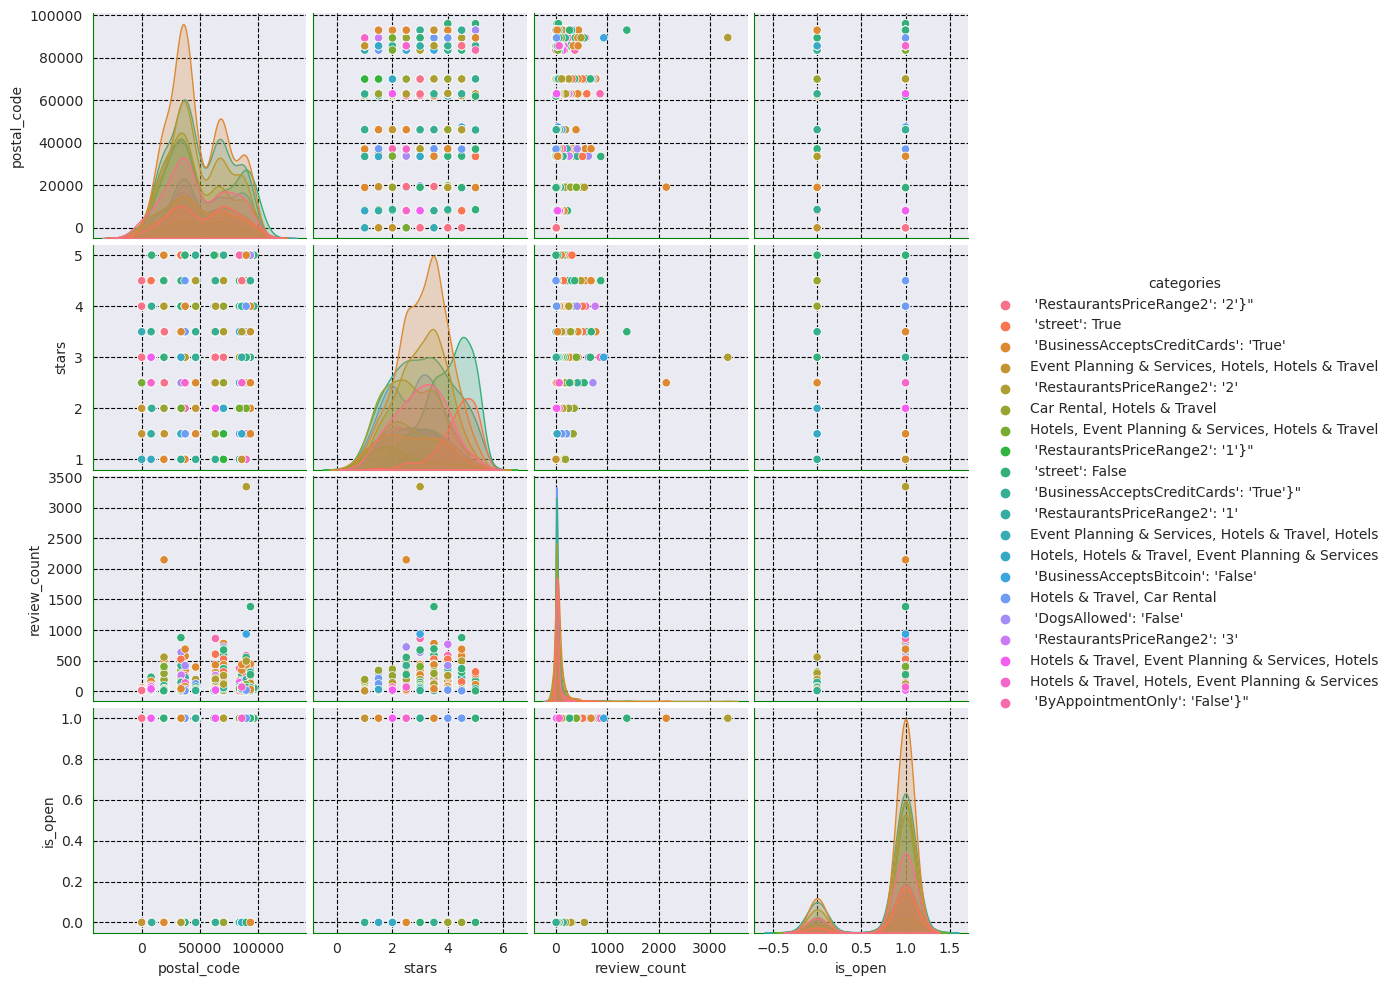

In [32]:
sns.pairplot(df_top_categories2, hue = "categories")

- Al igual que en el _pairplot_ de solo variables numéricas, en este gráfico también se observa:

- **Falta de Relación Lineal:** La dispersión total en los gráficos de dispersión indica que no existe una relación lineal clara entre las variables. En otras palabras, los valores de una variable no están relacionados de manera predecible con los valores de la otra variable.


- **Independencia:** La falta de una forma de campana en las diagonales sugiere que las variables son independientes entre sí. Esto significa que no hay una relación sistemática o correlación evidente entre las variables en el análisis.

- **Fronteras:** La falta de relación y la independencia marcada en las variables hace NO sea posible identificar fronteras entre una variable y otra, por cuanto todas se superponen, reafirmando las conclusiones anteriores.

### <font color='#307A71'>**iii. Análisis de Correlación**</font>

El coeficiente de correlación es una medida estadística de la fuerza de la relación entre los movimientos relativos de dos variables.

En otras palabras, cuando se comparan dos variables, si una variable cambia, ¿cómo cambia este efecto en la otra variable?.

+ Los valores oscilan entre -1,0 y 1,0. Una correlación de -1,0 muestra una correlación negativa perfecta , mientras que una correlación de 1,0 muestra una correlación positiva perfecta .

+ Una correlación de 0,0 no muestra una relación lineal entre el movimiento de las dos variables.


StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 35, Finished, Available)

/tmp/ipykernel_8262/1366031923.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df_pairplot.corr()


<AxesSubplot: >

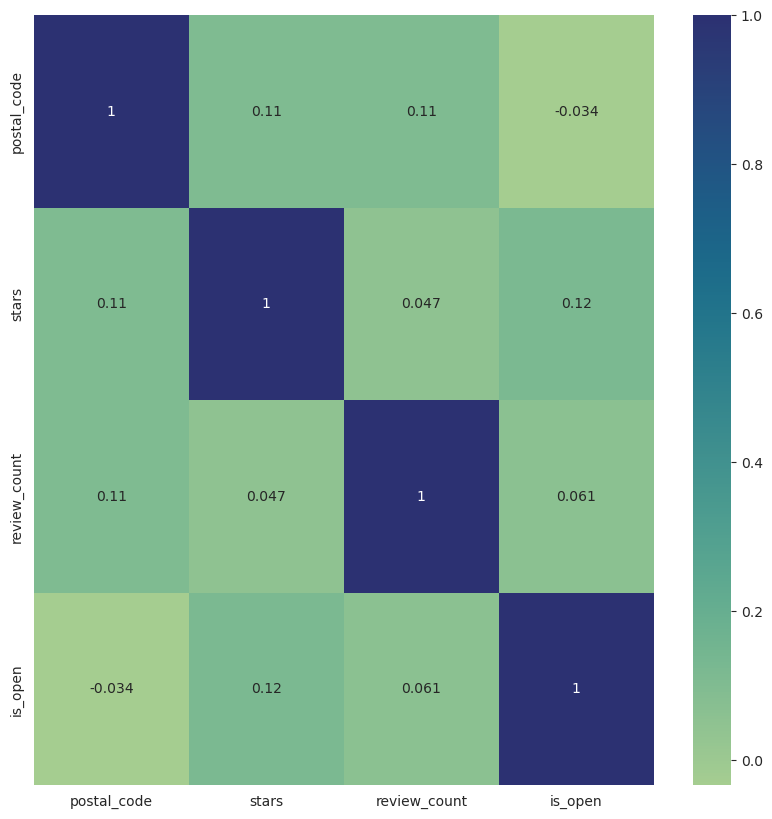

In [33]:
correlacion = df_pairplot.corr()
plt.figure(figsize=[10,10])
sns.heatmap(correlacion, annot=True, cmap='crest')

- Con este mapa de calor se reafirma las conclusiones obtenidas en los **pairplot** respecto de:
- **Falta de relación lineal.**

- **Independencia entre las variables.**


## <font color='#307A71'>**Conclusiones**</font>

- Se realizó limpieza de la data, así:
1. **Nulos:** Se convierten los valores no numéricos en NaN en las columnas _'postal_code'_ y _'address'_.
2. **Duplicados:** La Data no contenía valores duplicados
3. **Formato:** Se realizó cambio de formato a las variables que requerían cambio a _int_ o _float_.

* Al analizar la correlación entre las variables se identificó que no existe una relación lineal clara entre las variables, es decir, que los valores de una variable no están relacionados de manera predecible con los valores de la otra variable.

* De acuerdo con la ubicación en el mapa, los datos por Georeferenciación no se ubican solo en Estados Unidos, sino que algunas coordenadas se encuentran en Canada, dato que se debe tener en cuenta en los análisis que se realicen durante la ejecución del proyecto.

* Hay 1.596 categorías que incluyen la palabra **"Hotels"**, pero que no necesariamente los negocios son hoteles, por lo que el nuevo Dataset se envía a proceso de ETL para la extracción de los negocios que corresponden a **Hoteles** lo cual reducirá de manera significativa la base de datos original.

In [36]:
df_business.head(5)

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 38, Finished, Available)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,8wGISYjYkE2tSqn3cDMu8A,Nifty Car Rental,nan,Kenner,PA,70062,29.981183,-90.254012,3.5,14,1,None,"Automotive, Car Rental, Hotels & Travel, Truck...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
1,w_AMNoI1iG9eay7ncmc67w,River 127,nan,New Orleans,PA,70130,29.951359,-90.064672,3.0,12,1,"""{'BusinessAcceptsCreditCards': 'True', 'WiFi'...","'RestaurantsPriceRange2': '2'}""","Event Planning & Services, Hotels, Hotels & Tr..."
2,xM6LoUcnpDpMBzXs_7dXAg,Fairfield Inn & Suites,nan,Kennett Square,AB,19348,39.856248,-75.694610,3.0,37,1,"""{'BusinessAcceptsCreditCards': 'True', 'WiFi'...","'RestaurantsPriceRange2': '2'}""","Hotels, Hotels & Travel, Event Planning & Serv..."
3,uczmbBk5O3tYhGue13dCDg,New Orleans Spirit Tours,nan,New Orleans,IN,70130,29.958431,-90.065173,4.0,38,1,"""{'WiFi': """"u'no'""""}""","Hotels & Travel, Tours, Local Flavor","{'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ..."
4,eYxGFkxo6m3SYGVTh5m2nQ,Big Boyz Toyz Motorcycle Rentals,nan,Tucson,PA,85712,32.250324,-110.903655,4.5,8,1,None,"Towing, Hotels & Travel, Automotive, Motorcycl...","{'Monday': '8:30-18:0', 'Tuesday': '8:30-18:0'..."


In [37]:
df_business.info()

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 39, Finished, Available)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5858 entries, 0 to 5857
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   5858 non-null   object 
 1   name          5858 non-null   object 
 2   address       5858 non-null   object 
 3   city          5858 non-null   object 
 4   state         5858 non-null   object 
 5   postal_code   5858 non-null   int64  
 6   latitude      5858 non-null   float64
 7   longitude     5858 non-null   float64
 8   stars         5858 non-null   float64
 9   review_count  5858 non-null   int64  
 10  is_open       5858 non-null   int64  
 11  attributes    5858 non-null   object 
 12  categories    5858 non-null   object 
 13  hours         5858 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 640.8+ KB


In [39]:
df_business.to_csv("/lakehouse/default/Files/data/original/Yelp/EDA_business.csv")

StatementMeta(, 0c4a97aa-348c-418d-98c7-c8870563633c, 41, Finished, Available)